#### Bridges in a graph

Given an undirected Graph, The task is to find the Bridges in this Graph. 

An edge in an undirected connected graph is a bridge if removing it disconnects the graph. For a disconnected undirected graph, the definition is similar, a bridge is an edge removal that increases the number of disconnected components. 

Like Articulation Points, bridges represent vulnerabilities in a connected network and are useful for designing reliable networks.

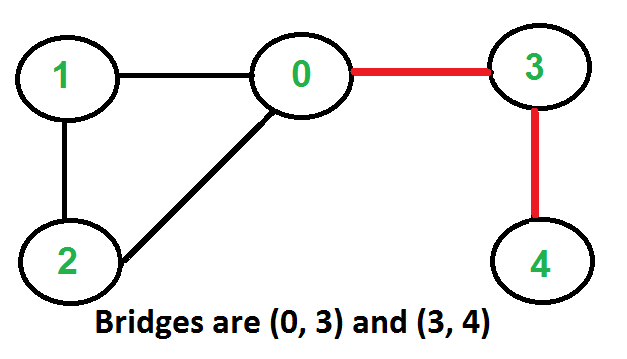

In [1]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Connectivity/img/Bridge1.png")

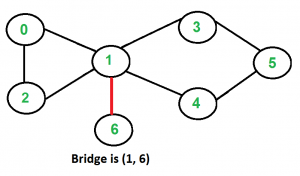

In [5]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Connectivity/img/Bridge2-300x176.png")

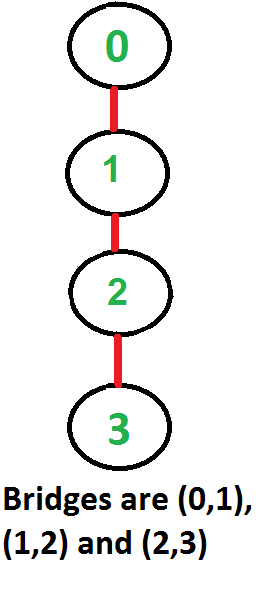

In [4]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Connectivity/img/Bridge3.png")

Naive Approach: Below is the idea to solve the problem:

One by one remove all edges and see if the removal of an edge causes a disconnected graph. 

Follow the below steps to Implement the idea:

For every edge (u, v), do the following:
1. Remove (u, v) from the graph 
2. See if the graph remains connected (either uses BFS or DFS) 
3. Add (u, v) back to the graph.

#### Time Complexity: O(E*(V+E)) 
    
for a graph represented by an adjacency list.

#### Auxiliary Space: O(V+E)

#### Find Bridges in a graph using Tarjan’s Algorithm.

Before heading towards the approach understand which edge is termed as bridge. Suppose there exists a edge from u -> v, now after removal of this edge if v can’t be reached by any other edges then u -> v edge is bridge. Our approach is based on this intuition, so take time and grasp it.

ALGORITHM: –

To implement this algorithm, we need the following data structures –

- visited[ ] = to keep track of the visited vertices to implement DFS
- disc[ ] = to keep track when for the first time that particular vertex is reached
- low[ ] = to keep track of the lowest possible time by which we can reach that vertex ‘other than parent’ so that if edge from parent is removed can the particular node can be reached other than parent.

We will traverse the graph using DFS traversal but with slight modifications i.e. while traversing we will keep track of the parent node by which the particular node is reached because we will update the low[node] = min(low[all it’s adjacent node except parent]) hence we need to keep track of the parent.

While traversing adjacent nodes let ‘v’ of a particular node let ‘u’, then 3 cases arise –

1. v is parent of u then, 

- skip that iteration.

2. v is visited then,

- update the low of u i.e. low[u] = min( low[u] , disc[v]) this arises when a node can be visited by more than one node, but low is to keep track of the lowest possible time so we will update it.

3. v is not visited then,

- call the DFS to traverse ahead
- now update the low[u] = min( low[u], low[v] ) as we know v can’t be parent cause we have handled that case first.
- now check if ( low[v] > disc[u] ) i.e. the lowest possible to time to reach ‘v’ is greater than ‘u’ this means we can’t reach ‘v’ without ‘u’ so the edge   u -> v is a bridge.

In [6]:
from collections import defaultdict
 
class Graph:
    def __init__(self,vertices):
        self.V= vertices
        self.graph = defaultdict(list)
        self.Time = 0
 
    def addEdge(self,u,v):
        self.graph[u].append(v)
        self.graph[v].append(u)

    def bridgeUtil(self,u, visited, parent, low, disc):
        visited[u]= True
        disc[u] = self.Time
        low[u] = self.Time
        self.Time += 1
        for v in self.graph[u]:
            if visited[v] == False :
                parent[v] = u
                self.bridgeUtil(v, visited, parent, low, disc)
                low[u] = min(low[u], low[v])
                if low[v] > disc[u]:
                    print ("%d %d" %(u,v))
                    
            elif v != parent[u]:
                low[u] = min(low[u], disc[v])

    def bridge(self):
        visited = [False] * (self.V)
        disc = [float("Inf")] * (self.V)
        low = [float("Inf")] * (self.V)
        parent = [-1] * (self.V)
        for i in range(self.V):
            if visited[i] == False:
                self.bridgeUtil(i, visited, parent, low, disc)
        
 
g1 = Graph(5)
g1.addEdge(1, 0)
g1.addEdge(0, 2)
g1.addEdge(2, 1)
g1.addEdge(0, 3)
g1.addEdge(3, 4)

 
print ("Bridges in first graph ")
g1.bridge()

g2 = Graph(4)
g2.addEdge(0, 1)
g2.addEdge(1, 2)
g2.addEdge(2, 3)
print ("\nBridges in second graph ")
g2.bridge()

g3 = Graph (7)
g3.addEdge(0, 1)
g3.addEdge(1, 2)
g3.addEdge(2, 0)
g3.addEdge(1, 3)
g3.addEdge(1, 4)
g3.addEdge(1, 6)
g3.addEdge(3, 5)
g3.addEdge(4, 5)
print ("\nBridges in third graph ")
g3.bridge()

Bridges in first graph 
3 4
0 3

Bridges in second graph 
2 3
1 2
0 1

Bridges in third graph 
1 6


#### Time Complexity: O(V+E)

The above approach uses simple DFS along with Tarjan’s Algorithm. 
So time complexity is the same as DFS which is O(V+E) for adjacency list representation of the graph.

#### Auxiliary Space: O(V) 

is used for visited, disc and low arrays.